#Bài thực hành 3

##Câu 1: Ôn tập và chuẩn bị dữ liệu


In [3]:
import pandas as pd
#1.1 Tải bộ dữ liệu
url_diem_thi = "https://github.com/anhdung98/diem_thi_2024/releases/download/240717/diem_thi_thpt_2024.csv"

df = pd.read_csv(url_diem_thi)
print(f"Kich thuoc bo dl goc: {df.shape}")

Kich thuoc bo dl goc: (1061605, 11)


In [5]:
#1.2 Lay ngau nhien 50k thi sinh
df_sample = df.sample(n=50000, random_state=42)
print(f"Kich thuoc bo dl sample: {df_sample.shape}")

Kich thuoc bo dl sample: (50000, 11)


In [6]:
df_sample.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
79883,1080461,7.4,8.0,3.2,NaN,NaN,NaN,6.75,6.75,8.75,N1
38703,1039042,6.6,9.0,8.8,6.5,4.75,5.75,NaN,NaN,NaN,N1
1013405,59001141,6.4,5.5,NaN,NaN,NaN,NaN,5.50,6.25,NaN,NaN
610922,30012765,3.8,7.5,NaN,NaN,NaN,NaN,6.00,8.00,NaN,NaN
19936,1020137,6.8,8.5,5.8,NaN,NaN,NaN,6.50,6.50,8.50,N1


In [8]:
df_sample.rename(columns={
    'sbd': 'id',
    'toan': 'Toan',
    'ngu_van': 'Ngu Van',
    'ngoai_ngu': 'Ngoai Ngu',
    'dia_li': 'Dia Li',
    'lich_su': 'Lich Su',
    'gdcd': 'GDCD',
    'sinh_hoc': 'Sinh Hoc',
    'hoa_hoc': 'Hoa Hoc',
    'vat_li': 'Vat Li',
    'ma_ngoai_ngu': 'Ma Ngoai Ngu'
}, inplace=True)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 79883 to 192941
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            50000 non-null  int64  
 1   Toan          49253 non-null  float64
 2   Ngu Van       49482 non-null  float64
 3   Ngoai Ngu     43100 non-null  float64
 4   Vat Li        16253 non-null  float64
 5   Hoa Hoc       16300 non-null  float64
 6   Sinh Hoc      16112 non-null  float64
 7   Lich Su       33286 non-null  float64
 8   Dia Li        33220 non-null  float64
 9   GDCD          27581 non-null  float64
 10  Ma Ngoai Ngu  43100 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 4.6+ MB


In [9]:
#1.3 Liet ke cot tinh diem
score_cols = ['Toan', 'Ngu Van', 'Ngoai Ngu', 'Dia Li', 'Lich Su', 'GDCD', 'Sinh Hoc', 'Hoa Hoc', 'Vat Li']

##Câu 2: Biến đổi Dữ liệu sang dạng giao dịch (transaction)


In [10]:
# Dien gia tri thieu NaN bang 0
df_sample[score_cols] = df_sample[score_cols].fillna(0)

In [11]:
# 2.1 va 2.2 Tao danh sach transaction
transactions = []
for index, row in df_sample.iterrows():
  subjects = [col for col in score_cols if row[col] > 1.0]
  transactions.append(subjects)
transactions[:5]

[['Toan', 'Ngu Van', 'Ngoai Ngu', 'Dia Li', 'Lich Su', 'GDCD'],
 ['Toan', 'Ngu Van', 'Ngoai Ngu', 'Sinh Hoc', 'Hoa Hoc', 'Vat Li'],
 ['Toan', 'Ngu Van', 'Dia Li', 'Lich Su'],
 ['Toan', 'Ngu Van', 'Dia Li', 'Lich Su'],
 ['Toan', 'Ngu Van', 'Ngoai Ngu', 'Dia Li', 'Lich Su', 'GDCD']]

In [15]:
#2.3 Chuyen doi sang One Hot Encoding
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)
df_trans.head()

,Dia Li,GDCD,Hoa Hoc,Lich Su,Ngoai Ngu,Ngu Van,Sinh Hoc,Toan,Vat Li
0,True,True,False,True,True,True,False,True,False
1,False,False,True,False,True,True,True,True,True
2,True,False,False,True,False,True,False,True,False
3,True,False,False,True,False,True,False,True,False
4,True,True,False,True,True,True,False,True,False


##Câu 3: Khai thác tập phổ biến với Apriori


In [20]:
# 3.1 va 3.2 Ap dung thuat toan Apriori
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_trans, min_support=0.5, use_colnames=True)
frequent_itemsets


,support,itemsets
0,0.66424,(Dia Li)
1,0.55162,(GDCD)
2,0.66564,(Lich Su)
3,0.86184,(Ngoai Ngu)
4,0.98942,(Ngu Van)
...,...,...
58,0.54934,"(Toan, Ngu Van, Lich Su, GDCD, Dia Li)"
59,0.54312,"(Toan, Ngoai Ngu, Ngu Van, GDCD, Dia Li)"
60,0.54430,"(Toan, Ngoai Ngu, Ngu Van, Lich Su, Dia Li)"
61,0.54314,"(Toan, Ngoai Ngu, Ngu Van, Lich Su, GDCD)"


In [21]:
# 3.3 In ra ket qua cac tap pho bien tim duoc
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
4,0.98942,(Ngu Van)
5,0.98504,(Toan)
20,0.97460,"(Ngu Van, Toan)"
3,0.86184,(Ngoai Ngu)
19,0.86118,"(Toan, Ngoai Ngu)"
...,...,...
57,0.54326,"(Toan, Ngoai Ngu, Lich Su, GDCD, Dia Li)"
54,0.54316,"(GDCD, Toan, Ngu Van, Ngoai Ngu)"
61,0.54314,"(Toan, Ngoai Ngu, Ngu Van, Lich Su, GDCD)"
59,0.54312,"(Toan, Ngoai Ngu, Ngu Van, GDCD, Dia Li)"


Ba tổ hợp gồm 2 môn thi phổ biến nhất là Ngu Van va Toan

Tổ hợp gồm 3 môn thi phổ biến nhất là Ngu van, Toan, Ngoai Ngu

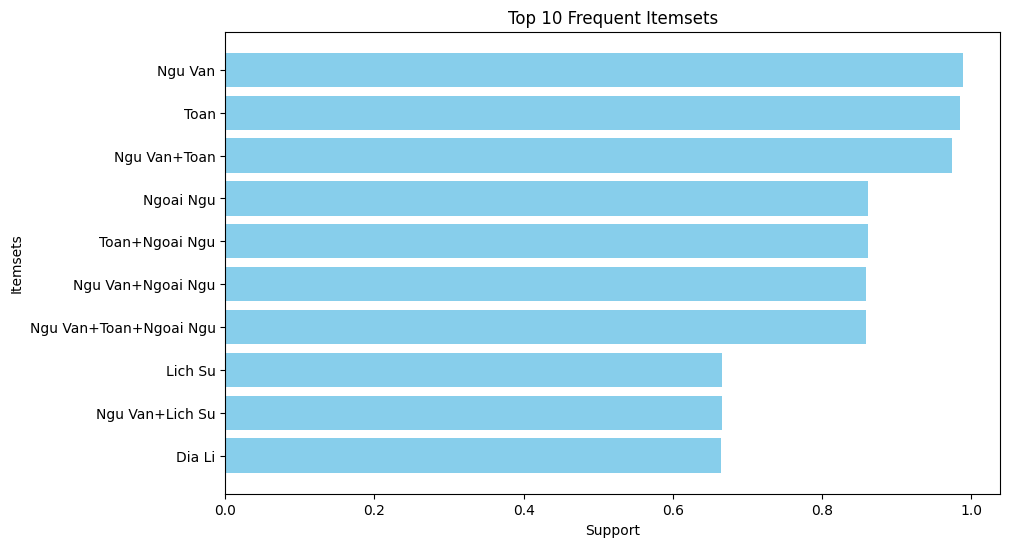

In [25]:
import matplotlib.pyplot as plt

top_sets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(['+'.join(i) for i in top_sets['itemsets']], top_sets['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Top 10 Frequent Itemsets')
plt.gca().invert_yaxis()
plt.show()

##Câu 4: Sinh và phân tích Luật kết hợp


In [24]:
# 4.1 va 4.2
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(GDCD),(Dia Li),0.55162,0.66424,0.55138,0.999565,1.504825,1.0,0.184972,771.716380,0.748184,0.829792,0.998704,0.914828
1,(Dia Li),(GDCD),0.66424,0.55162,0.55138,0.830092,1.504825,1.0,0.184972,2.638950,0.999139,0.829792,0.621061,0.914828
2,(Dia Li),(Lich Su),0.66424,0.66564,0.66378,0.999307,1.501273,1.0,0.221635,482.815840,0.994456,0.996517,0.997929,0.998257
3,(Lich Su),(Dia Li),0.66564,0.66424,0.66378,0.997206,1.501273,1.0,0.221635,120.158756,0.998620,0.996517,0.991678,0.998257
4,(Dia Li),(Ngoai Ngu),0.66424,0.86184,0.54498,0.820456,0.951982,1.0,-0.027489,0.769507,-0.130605,0.555479,-0.299533,0.726401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,"(Dia Li, Lich Su)","(Ngu Van, Toan, GDCD, Ngoai Ngu)",0.66378,0.54316,0.54312,0.818223,1.506412,1.0,0.182581,2.513188,0.999855,0.818174,0.602099,0.909075
465,"(GDCD, Dia Li)","(Ngu Van, Toan, Lich Su, Ngoai Ngu)",0.55138,0.54448,0.54312,0.985019,1.809101,1.0,0.242905,30.407339,0.996922,0.982596,0.967113,0.991261
466,(Lich Su),"(Toan, Ngoai Ngu, Ngu Van, GDCD, Dia Li)",0.66564,0.54312,0.54312,0.815937,1.502314,1.0,0.181598,2.482187,1.000000,0.815937,0.597130,0.907968
467,(GDCD),"(Toan, Ngoai Ngu, Ngu Van, Lich Su, Dia Li)",0.55162,0.54430,0.54312,0.984591,1.808912,1.0,0.242873,29.573322,0.997327,0.982489,0.966186,0.991211


In [26]:
# 4.3
rules.sort_values(by='lift', ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
455,"(GDCD, Toan)","(Ngu Van, Dia Li, Lich Su, Ngoai Ngu)",0.54954,0.54460,0.54312,0.988318,1.814759,1.0,0.243841,38.981389,0.996676,0.985663,0.974347,0.992800
431,"(Ngu Van, Dia Li, Lich Su, Ngoai Ngu)","(GDCD, Toan)",0.54460,0.54954,0.54312,0.997282,1.814759,1.0,0.243841,165.757105,0.985864,0.985663,0.993967,0.992800
307,"(GDCD, Toan)","(Dia Li, Lich Su, Ngoai Ngu)",0.54954,0.54480,0.54326,0.988572,1.814560,1.0,0.243871,39.832899,0.996542,0.985810,0.974895,0.992873
303,"(Dia Li, Lich Su, Ngoai Ngu)","(GDCD, Toan)",0.54480,0.54954,0.54326,0.997173,1.814560,1.0,0.243871,159.357538,0.986165,0.985810,0.993725,0.992873
448,"(Dia Li, Lich Su, Ngoai Ngu)","(Ngu Van, Toan, GDCD)",0.54480,0.54940,0.54312,0.996916,1.814555,1.0,0.243807,146.123143,0.986161,0.985556,0.993156,0.992743


4.4 Ý nghĩa của độ Lift cao nhất: Cho ta biết về xu hướng chọn môn thi của thí sinh. Lift cao nhất là 1.814759 (GDCD, Toán) - lớn hơn 1. Điều này cho thấy thí sinh có xu hướng thi GDCD, Toán thì đăng ký thi (Ngữ Văn, Địa Lí, Lịch Sử, Ngoại Ngữ). Độ tin cậy (confidence) cao 0.988318.